In [ ]:
import graphviz as gv
import random
import heapq
import math

In [ ]:
def randomG(n, m, directed=False, weighted=False, wrange=(1, 10)):
    if directed:
        checker = [(i, j) for i in range(n) for j in range(i, n) if i != j]
    else:
        checker = [(i, j) for i in range(n) for j in range(i+1, n)]

    random.shuffle(checker)
    G = [[] for _ in range(n)]
    checker = checker[:m]
    checker.sort()
    for u, v in checker:
        if weighted:
            w = random.randint(*wrange)
            G[u].append((v, w))
            if not directed:
                G[v].append((u, w))
            continue

        G[u].append(v)
        if not directed:
            G[v].append(u)

    return G


randomG(10, 30, directed=True, weighted=True)

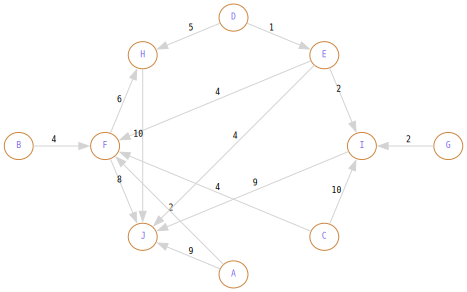

In [60]:
def showG(G, labels=None, path=[], directed=False, weighted=False,
          layout='circo', pathcolor='darkorange',
          node_attr={
              'color': 'peru',
              'fontcolor': 'mediumslateblue',
              'fontname': 'monospace',
              'fontsize': '8',
              'height': '0.1',
              'width': '0.1',
          },
          edge_attr={
              'color': 'lightgray',
              'fontname': 'monospace',
              'fontsize': '8',
          }):

    # setup the graph
    dot = gv.Digraph('x') if directed else gv.Graph('y')
    dot.graph_attr['layout'] = layout

    for attr, value in node_attr.items():
        dot.node_attr[attr] = value

    for attr, value in edge_attr.items():
        dot.edge_attr[attr] = value

    # adding nodes and labels
    n = len(G)
    if not labels:
        labels = map(str, range(n))

    for u, label in enumerate(labels):
        dot.node(str(u), label)

    # easy access path arcs with direction both ways to avoid omitting
    rpath = dict()
    for node, parent in enumerate(path):
        if parent == -1:
            continue

        rpath[f'{parent},{node}'] = 'forward'
        rpath[f'{node},{parent}'] = 'back'

    # create a list of edges pulling path info and sort it, ensure same figure
    checker = set()
    edges = []
    for u in range(n):
        for edge in G[u]:
            v, w = edge if weighted else (edge, None)
            e = f'{u},{v}'
            if e in checker:
                continue

            edges.append((u, v, w, '' if e not in rpath else rpath[e]))
            checker.add(e)
            if not directed:
                checker.add(f'{v},{u}')

    # adding edges to the dot graph
    edges.sort()
    for u, v, w, dirpath in edges:
        edgeinfo = map(str, (u, v, w) if w else (u, v))
        if dirpath:
            dot.edge(*edgeinfo, dir=dirpath, color=pathcolor)
        else:
            dot.edge(*edgeinfo)

    return dot


showG(randomG(10, 15, weighted=True, directed=True),
      labels='ABCDEFGHIJ', weighted=True, directed=True)

In [ ]:
def bfs(G, s):
    n = len(G)
    visited = [False]*n
    parents = [-1]*n
    queue = [s]
    visited[s] = True
    while queue:
        u = queue.pop(0)
        for v in G[u]:
            if not visited[v]:
                visited[v] = True
                parents[v] = u
                queue.append(v)

    return parents

In [ ]:
def dfs(G, s):
    n = len(G)
    visited = [False]*n
    parents = [-1]*n

    def _dfs(u):
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                parents[v] = u
                _dfs(v)

    _dfs(s)

    return parents

In [ ]:
def lds(G, s, L):
    n = len(G)
    visited = [False]*n
    parents = [-1]*n

    def _dfs(u, l):
        if l == 0: return
        visited[u] = True
        for v in G[u]:
            if not visited[v]:
                parents[v] = u
                _dfs(v, l - 1)

    _dfs(s, L)

    return parents

In [ ]:
def ids(G, s, t):
    n = len(G)
    for L in range(1, n+1):
        path = lds(G, s, L)
        if path[t] != -1:
            break
    return path, L

In [61]:
def dijkstra(G, s):
    n = len(G)
    visited = [False]*n
    path = [-1]*n
    g = [math.inf]*n
    q = []
    heapq.heappush(q, (0, s))
    g[s] = 0

    while q:
        _, u = heapq.heappop(q)
        if visited[u]:
            continue

        visited[u] = True
        for v, w in G[u]:
            if not visited[v] and g[u] + w < g[v]:
                g[v] = g[u] + w
                path[v] = u
                heapq.heappush(q, (g[v], v))

    return path, g

In [ ]:
G = randomG(10, 15)
print(G)
showG(G)

In [ ]:
path = bfs(G, 0)
print(path)
showG(G, path=path)

In [ ]:
path = dfs(G, 0)
print(path)
showG(G, path=path)

In [ ]:
path = lds(G, 0, 2)
print(path)
showG(G, path=path)

In [ ]:
path = lds(G, 0, 5)
print(path)
showG(G, path=path)

In [ ]:
path = lds(G, 0, 10)
print(path)
showG(G, path=path)

In [ ]:
path = lds(G, 0, 20)
print(path)
showG(G, path=path)

In [ ]:
path, L = ids(G, 0, 6)
print(path, L)
showG(G, path=path)

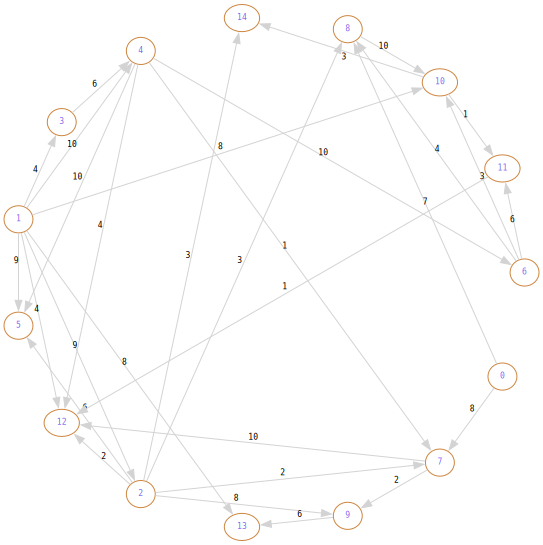

In [62]:
G = randomG(15, 30, weighted=True, directed=True)
showG(G, weighted=True, directed=True)

[-1, -1, 1, 1, 1, 1, 4, 2, 2, 7, 1, 10, 1, 1, 10] [inf, 0, 9, 4, 10, 9, 20, 11, 12, 13, 8, 9, 4, 8, 11]


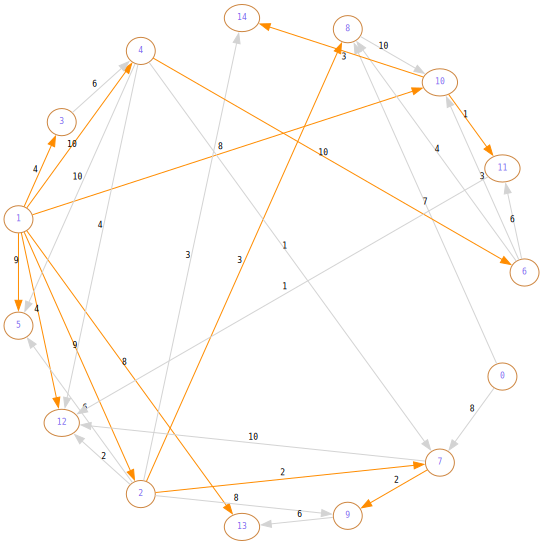

In [64]:
path, cost = dijkstra(G, 1)
print(path, cost)
showG(G, weighted=True, directed=True, path=path)